In [1]:
set.seed(1)
suppressMessages(library(tidyverse))
library('metap')

Warning message:
"package 'tidyverse' was built under R version 4.2.1"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.1"
Warning message:
"package 'dplyr' was built under R version 4.2.1"
Warning message:
"package 'stringr' was built under R version 4.2.1"
Warning message:
"package 'forcats' was built under R version 4.2.1"
Warning message:
"package 'metap' was built under R version 4.2.1"


In [2]:
#

In [3]:
casual_db <- read.table("../../ANALYSIS/FINEMAP/CAUSALDB.tab",header=T)%>%filter(PAINTOR > 0|CAVIARBF>0|FINEMAP>0)
trait_mapping <- read.table("../../ANALYSIS/FINEMAP/causaldb_meta_info_v1.2.txt",header=T,fill=TRUE)%>%rename(meta_id=file_name)
df_cas <- merge(casual_db,trait_mapping,by="meta_id")%>%rename(MARKERNAME=rsrsID)

In [4]:
###

In [5]:
Metasoft_results <-  read.table("../../ANALYSIS/META/METASOFT/SECOND_PASS/TRANSANCESTRY_METASOFT_SECONDPASS_RESULTS.TAB",fill=TRUE,row.names=NULL,header=FALSE)
META_THREE <- read.table(gzfile("../data/TRANSANCESTRY_GWAS.TAB.gz"),header=T,fill=TRUE,row.names=NULL)
colnames(Metasoft_results) <- c("MARKERNAME","N","PVALUE_FE","BETA_FE","STD_FE","PVALUE_RE","BETA_RE","STD_RE","PVALUE_RE2","STAT1_RE2","STAT2_RE2","PVALUE_BE","I_SQUARE","Q","PVALUE_Q","TAU_SQUARE",
                                "PVALUE_ADIPOGEN","PVALUE_AGEN","PVALUE_METSIM","NA1","NA2","NA3")
Metasoft_results <- Metasoft_results%>%filter(MARKERNAME!="RSID")
TRANSANCESTRY_RESULTS <- merge(META_THREE,Metasoft_results,by="MARKERNAME")
TRANSANCESTRY_RESULTS <- TRANSANCESTRY_RESULTS%>%mutate(TOTAL_N=ceiling(ADIPO_N)+ceiling(AGEN_N)+ceiling(METSIM_N))%>%mutate(MAF_AVG=(ADIPO_EAF*2*ADIPO_N+AGEN_EAF*2*AGEN_N+METSIM_EAF*2*METSIM_N)/(2*TOTAL_N))%>%
filter(ADIPO_EAF>0.005)%>%filter(AGEN_EAF>0.005)%>%filter(METSIM_EAF>0.005)%>%select(-NA1,-N,-NA2,-NA3)

In [6]:
#

In [7]:
snp_pos <- read.table("../../ANALYSIS/FINEMAP/trans_rsid.txt")
colnames(snp_pos) <- c("MARKERNAME")
fm_rsid <- merge(TRANSANCESTRY_RESULTS,snp_pos,by="MARKERNAME")%>%select(MARKERNAME,CHROMOSOME,POSITION)

In [8]:
#

In [9]:
df_cas$P<- as.double(df_cas$P)
cdb <- merge(df_cas,fm_rsid,by="MARKERNAME")
plot_df <- suppressWarnings(cdb%>%group_by(mesh_term)%>% mutate(count = n())%>%filter(count>=2)%>%select(CHROMOSOME,POSITION,mesh_term,P)%>%group_by(POSITION,mesh_term)%>%
mutate(ncount = n())%>%mutate(logp=case_when(ncount>1 ~ as.double(allmetap(as.double(PVALUE),method="sumz")$p)))%>%mutate(logp = coalesce(logp,P))%>%mutate(logp=-log10(logp)))%>%
ungroup()%>%mutate(logp= as.numeric(ifelse(is.finite(logp), logp, "100")))%>%unite(POS,CHROMOSOME,POSITION, sep = ":", remove = FALSE)

In [10]:
write.table(plot_df,"../../ANALYSIS/TABLES/CAUSALDB_TABLE.txt",quote=FALSE,row.names = FALSE)

In [14]:
library('RColorBrewer')

In [15]:
coul <- brewer.pal(n = 9, name = "Reds")

In [16]:
colorRampPalette(coul)(50)

[1] "#FFF5F0" "#FEF1EB" "#FEEEE6" "#FEEAE1" "#FEE7DC" "#FEE3D7" "#FEE0D2"
 [8] "#FDDACB" "#FDD4C3" "#FDCEBB" "#FCC8B3" "#FCC2AB" "#FCBCA3" "#FCB59B"
[15] "#FCAF93" "#FCA88B" "#FCA184" "#FC9B7C" "#FC9474" "#FB8D6D" "#FB8767"
[22] "#FB8060" "#FB7A5A" "#FB7353" "#FB6D4D" "#FA6647" "#F85E42" "#F6563D"
[29] "#F44F38" "#F24733" "#F03F2F" "#EC382B" "#E63328" "#E12D26" "#DB2723"
[36] "#D52221" "#CF1C1E" "#C9171C" "#C3161B" "#BD141A" "#B61318" "#B01117"
[43] "#AA1016" "#A30E14" "#990C13" "#8F0912" "#850710" "#7B040F" "#71020E"
[50] "#67000D"

In [17]:
summary(plot_df$logp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.351   7.220   9.030  12.592  14.094 169.914 

In [18]:
plot_df%>%filter(logp>50)

POS,CHROMOSOME,POSITION,mesh_term,P,ncount,logp
<chr>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>
4:89730074,4,89730074,Waist-Hip_Ratio,5.529e-53,4,52.25735
12:124469738,12,124469738,Waist-Hip_Ratio,2.800e-111,6,110.55284
12:124469738,12,124469738,Waist-Hip_Ratio,2.800e-111,6,110.55284
6:43757896,6,43757896,Waist-Hip_Ratio,5.480e-120,11,119.26122
6:43757896,6,43757896,Waist-Hip_Ratio,7.420e-92,11,91.12960
6:43757896,6,43757896,Waist-Hip_Ratio,1.220e-170,11,169.91364
6:43757896,6,43757896,Waist-Hip_Ratio,1.054e-79,11,78.97716


In [19]:
coul 

[1] "#FFF5F0" "#FEE0D2" "#FCBBA1" "#FC9272" "#FB6A4A" "#EF3B2C" "#CB181D"
[8] "#A50F15" "#67000D"

In [30]:
library(RColorBrewer)
suppressWarnings(suppressMessages(library(viridis)))
coul <- brewer.pal(n = 9, name = "YlOrRd")
#coul <- colorRampPalette(coul)(9)
options(repr.plot.width=30, repr.plot.height=20)
p8 <- ggplot(plot_df%>%filter(logp<50), aes(x = POS, y = fct_rev(mesh_term), fill = logp)) +
  geom_tile()    +
  scale_fill_gradientn(colors = coul) + scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+
  coord_fixed()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+guides(fill = guide_colourbar(barwidth = 0.5,
                                barheight = 20))+theme(axis.text = element_text(size=22))+
                                                                              theme(axis.text.x = element_text(size = 22),legend.title=element_text(size=20),legend.text=element_text(size=18))+ theme(axis.text.y= element_text(size = 20))+
                                                         aes(x = fct_reorder(POS, CHROMOSOME))+xlab("")+ylab("")

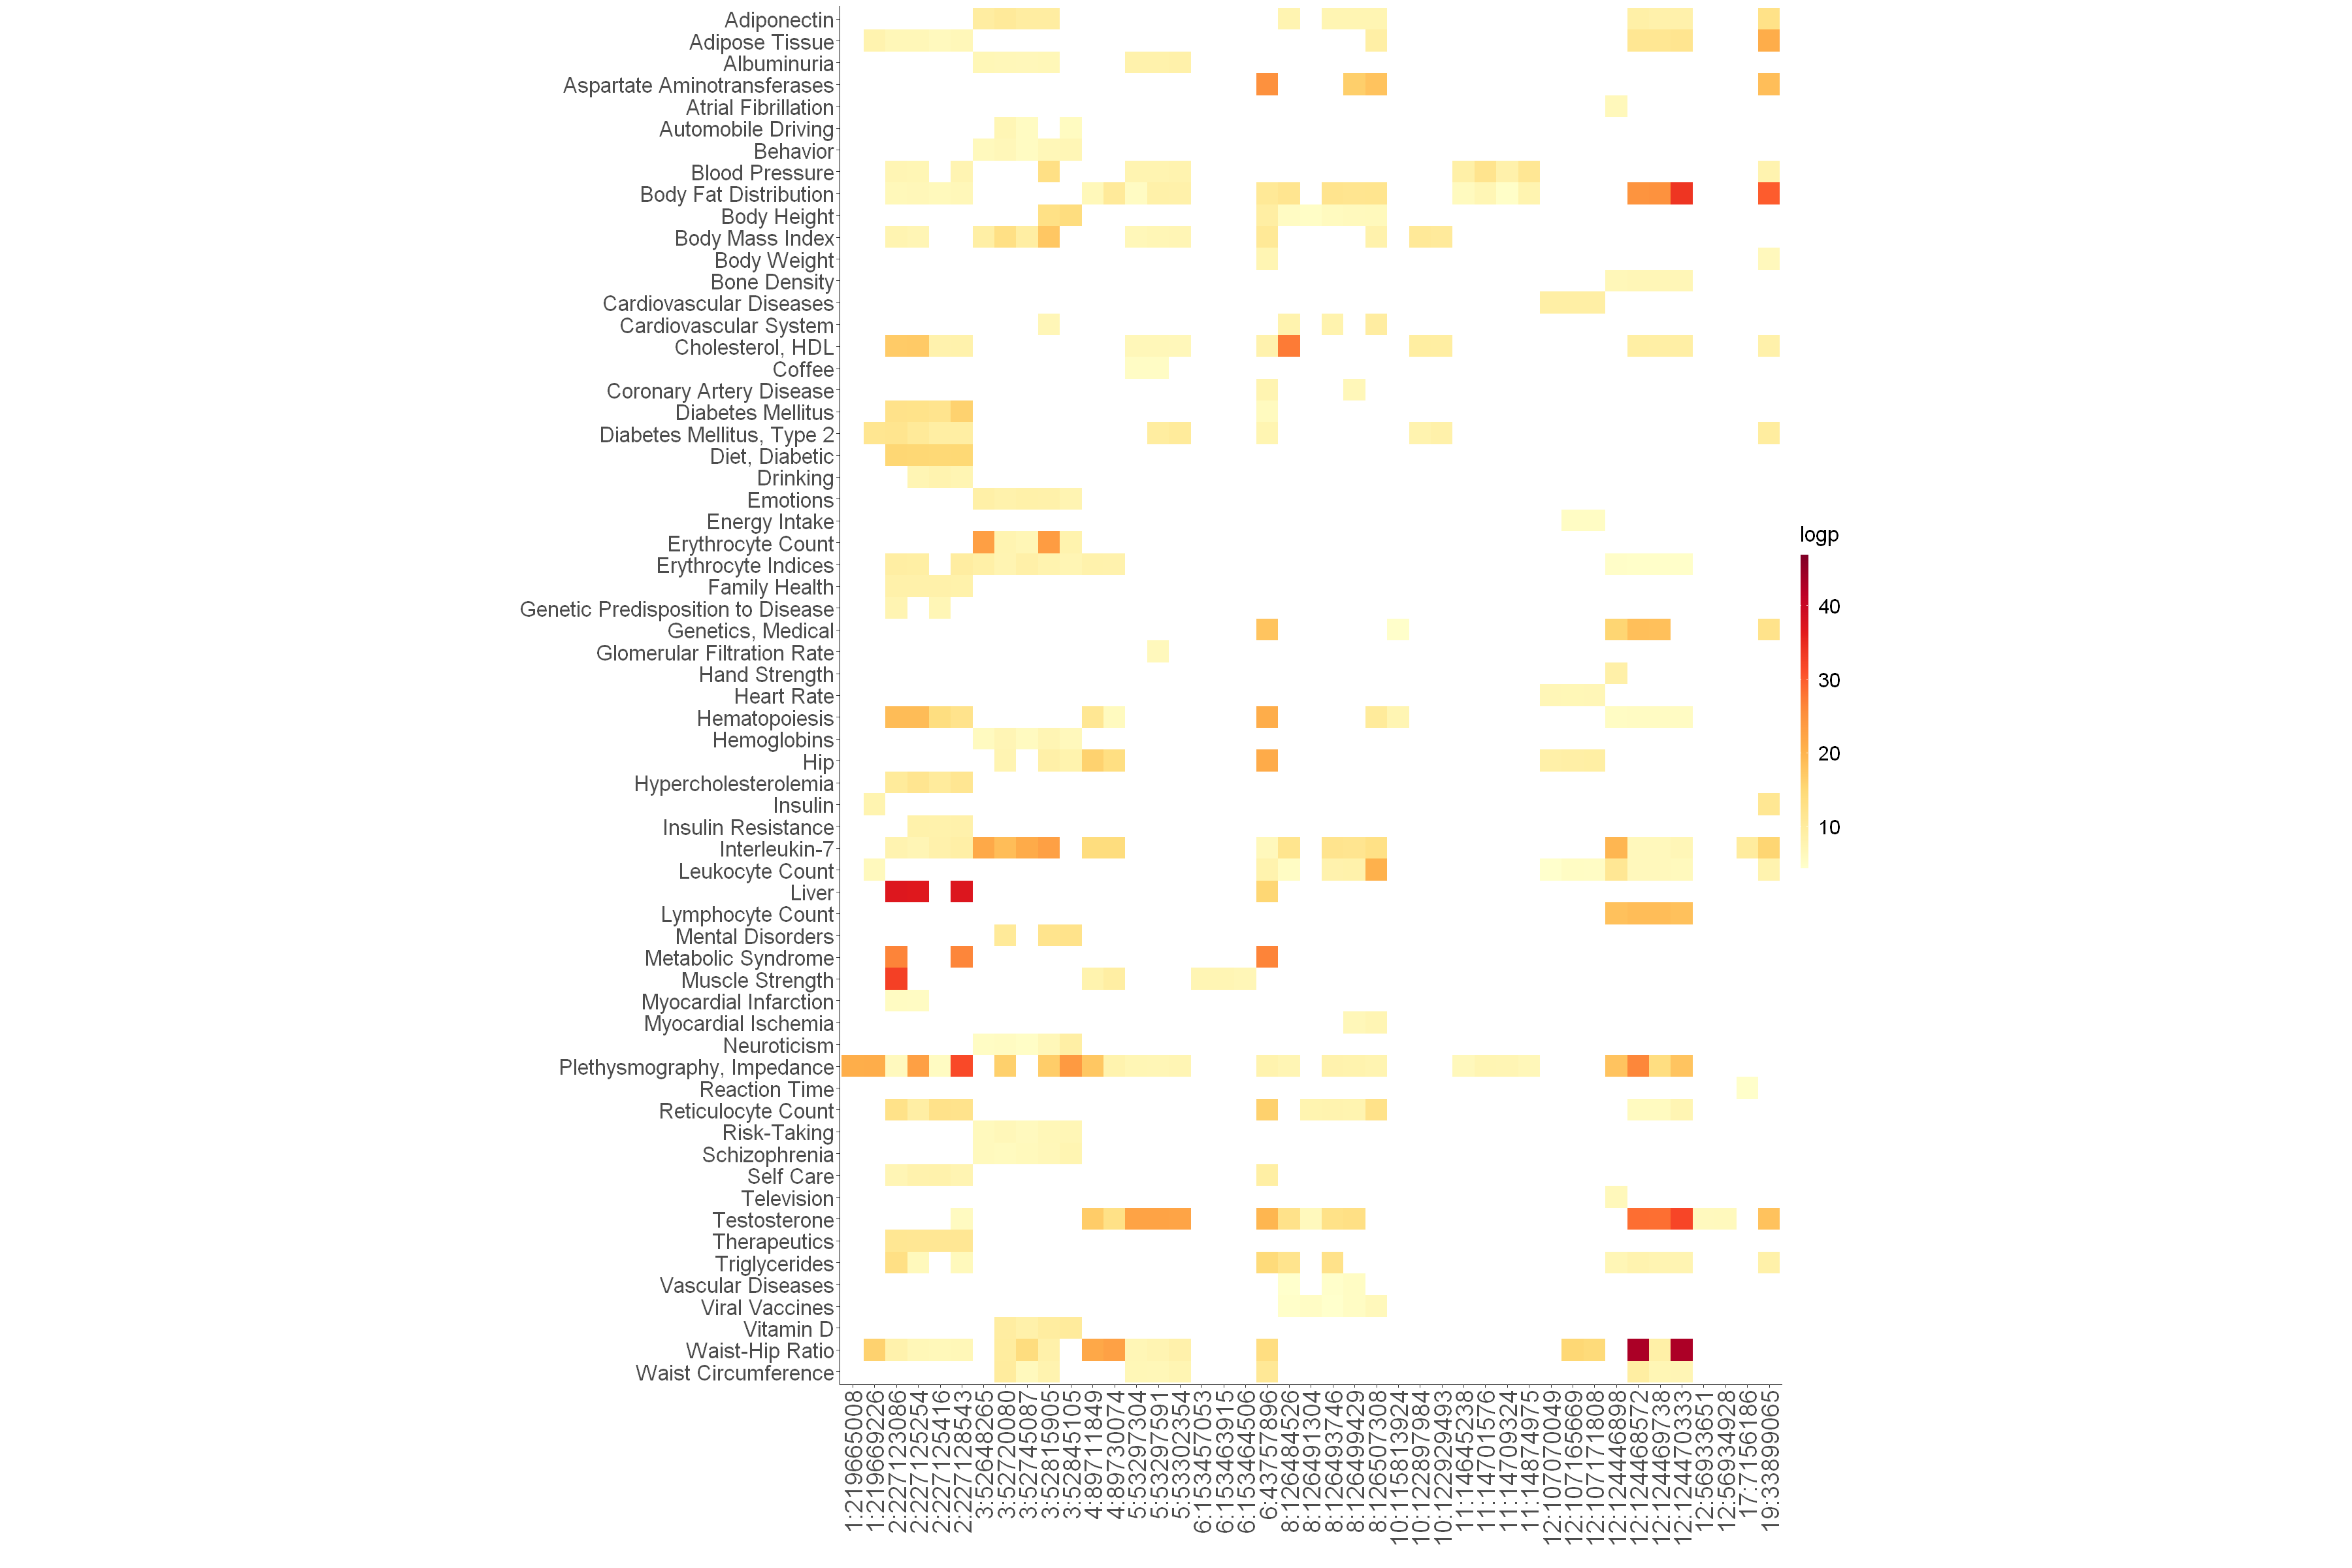

In [31]:
p8

In [37]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig9.jpeg", device = "jpeg",  plot = p8, width = 30, height =20 , dpi = 600, units = "in")